In [1]:
import numpy as np
import matplotlib.pyplot as plt
from emnist import extract_training_samples
from emnist import extract_test_samples
import time

start = time.time()

im_size = 28
num_images = 100000
k = 26

images_training, labels_training = extract_training_samples('letters')
images_test, labels_test = extract_test_samples('letters')

def learn(mat):
    for i in range(im_size):
        for j in range(im_size):
            if mat[i,j] == 1:
                mat[i,j] += 1
            else:
                mat[i,j] += -1
    return mat

def readim(im):
    th = 128
    im_bool = (im > th) 
    mat = np.zeros((im_size, im_size))
    for i in range(im_size):
        for j in range(im_size):
            if im_bool[i,j]:
                mat[i,j] = 1
            else:
                mat[i,j] = 0
    return mat

alphabet = np.array(['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z'])

Wk = np.zeros((k,im_size,im_size))
for i in range(num_images):
    Wk[int(labels_training[i]) - 1] += learn(readim(images_training[i]))
    
# Fonction renvoyant ce que le reseau de neuronnes pense etre la lettre la plus probable
def Q(image):
    I = image
    phik = np.zeros(k)
    muk = np.zeros(k)
    Qk = np.zeros(k)

    for i in range(k):
        for j in range(im_size):
            for l in range(im_size):
                phik[i] += Wk[i][j][l]*I[j][l]
                if Wk[i][j][l] > 0:
                    muk[i] += Wk[i][j][l]
        Qk[i] = phik[i]/muk[i]
    return np.argmax(Qk)
    
end = time.time()
print(f"Temps d'execution du programme: {end - start} s")

Temps d'execution du programme: 15.617886066436768 s


0.485
Temps d'execution du programme: 13.055029392242432 s


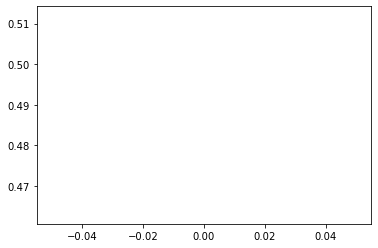

In [2]:
start = time.time()

# Test verifiant si le reseau de neuronnes est performant
num_images_test = 2000
n = int(20800/num_images_test)
Qstat = 0
Qkstat = np.zeros(k)
kk = np.zeros(k)
for i in range(int(num_images_test - 1)):
    if Q(images_test[n*i]) == int(labels_test[n*i] - 1):
        Qstat += 1
        Qkstat[int(labels_test[n*i] - 1)] += 1
    kk[int(labels_test[n*i] - 1)] += 1


print(Qstat/num_images_test)
plt.plot(Qkstat/kk)

end = time.time()
print(f"Temps d'execution du programme: {end - start} s")

#    num_images    Q          t
#    4000          0.5805     212.73033499717712 s
#    5000          0.504      253.27191281318665 s
#    6000          0.45316    306.93508982658386 s
#    7000          0.453      341.8125755786896 s
# 7000/6000 0.454 287.9s
# 7000/5000 0.5034 241.8s
# 7000/400  0.47   19.7 s
# 7000/100  0.46   5.1  s
#
# 8000/8000 0.413 409.5 s

# 15000/15000  0.487 776.2s
# 15000/2000   0.587 102.0s
# 20000/20000  0.491 1023.2s
# 20000/2000   0.580 102.7s
# 50000/2000   0.570 127.9s
# 100000/2000  0.567 101.7s
# 100000/4000  0.568 249.9s
# 100000/6000  0.466 424.0s
# 100000/8000  0.423 550.5s
# 100000/10000 0.411 534.3s
# 100000/20000 0.490 1083.5s
#
# limite images_test: 20800

13


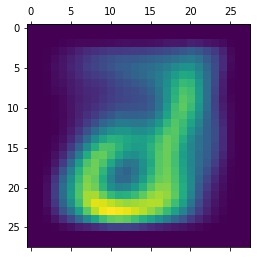

In [29]:
def Qk(image):
    I = image
    phik = np.zeros(k)
    muk = np.zeros(k)
    Qk = np.zeros(k)

    for i in range(k):
        for j in range(im_size):
            for l in range(im_size):
                phik[i] += Wk[i][j][l]*I[j][l]
                if Wk[i][j][l] > 0:
                    muk[i] += Wk[i][j][l]
        Qk[i] = phik[i]/muk[i]
    return Qk, phik, muk

n = 10011
print(labels_test[n])
#plt.plot(Qk(images_test[n])[0])
plt.matshow(Wk[3])

In [31]:
from emnist import list_datasets

list_datasets()
images_balanced, labels_balanced = extract_training_samples('balanced')


In [77]:
start = time.time()

num_images = 40000
k = 37
Wk = np.zeros((k,im_size,im_size))
for i in range(num_images):
    if labels_balanced[i] >= 9:
        Wk[int(labels_balanced[i]) - 10] += learn(readim(images_balanced[i]))
    
end = time.time()
print(f"Temps d'execution du programme: {end - start} s")

Temps d'execution du programme: 41.386056661605835 s


0.3795
Temps d'execution du programme: 695.3904645442963 s


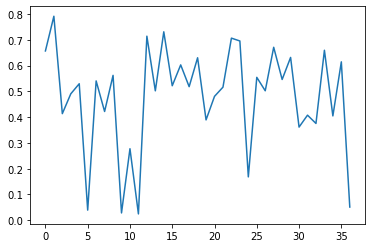

In [81]:
images_balanced_test, labels_balanced_test = extract_test_samples('balanced')

start = time.time()

# Test verifiant si le reseau de neuronnes est performant
num_images_test = 10000
Qstat = 0
Qkstat = np.zeros(k)
kk = np.zeros(k)
for i in range(int(num_images_test - 1)):
    if labels_balanced_test[i] >= 9:
        if Q(images_balanced_test[i]) == int(labels_balanced_test[i] - 10):
            Qstat += 1
            Qkstat[int(labels_balanced_test[i] - 10)] += 1
        kk[int(labels_balanced_test[i] - 10)] += 1


print(Qstat/num_images_test)
plt.plot(Qkstat/kk)

end = time.time()
print(f"Temps d'execution du programme: {end - start} s")

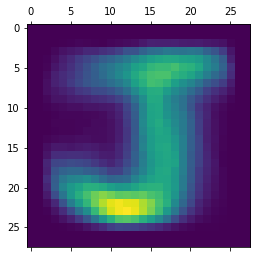

In [87]:
# 10000/max 0.380 
# 10000/1000 0.394
# 20000/1000 0.393
# 30000/1000 0.393
# 40000/1000 0.39
plt.matshow(Wk[9])

In [101]:
Qkcorr = 0
m = 0
for i in range(len(Qkstat)):
    if Qkstat[i]/kk[i] > 0.5:
        Qkcorr += Qkstat[i]/kk[i]
        m += 1
    else:
        print(i)
Qkcorr/m

2
3
5
7
9
10
11
19
20
24
30
31
32
34
36


0.6091890429427207

array([136., 171.,  91., 104., 107.,   8., 113.,  92., 122.,   6.,  58.,
         5., 145., 113., 166., 107., 126., 113., 128.,  81., 100., 110.,
       147., 144.,  36., 117., 104., 147., 124., 127.,  77.,  95.,  80.,
       157.,  83., 134.,  21.])